<a href="https://colab.research.google.com/github/Varshan98/DSL_Quiz/blob/main/Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [45]:
print("[INFO]: Init the Verilog ENV")
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

[INFO]: Init the Verilog ENV
The plugin extension is already loaded. To reload it, use:
  %reload_ext plugin


## Decade Counter

Basic Decade Counter

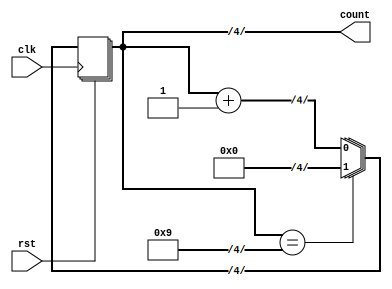

In [48]:
%%print_verilog

module decade_counter (
    input wire clk,      // Clock signal
    input wire rst,      // Active-high reset
    output reg [3:0] count  // 4-bit counter output
);

    always @(posedge clk or posedge rst) begin
        if (rst) begin
            count <= 4'b0000;  // Reset the counter to 0
        end
        else if (count == 4'b1001) begin
            count <= 4'b0000;  // Reset when count reaches 9
        end
        else begin
            count <= count + 1; // Increment counter
        end
    end

endmodule



In [49]:
%%verilog
module decade_counter (
    input wire clk,      // Clock signal
    input wire rst,      // Active-high reset
    output reg [3:0] count  // 4-bit counter output
);

    always @(posedge clk or posedge rst) begin
        if (rst) begin
            count <= 4'b0000;  // Reset the counter to 0
        end
        else if (count == 4'b1001) begin
            count <= 4'b0000;  // Reset when count reaches 9
        end
        else begin
            count <= count + 1; // Increment counter
        end
    end

endmodule


module tb_decade_counter;

    reg clk, rst;
    wire [3:0] count;

    // Instantiate the decade counter module
    decade_counter uut (
        .clk(clk),
        .rst(rst),
        .count(count)
    );

    // Generate clock with a period of 10 time units
    always #2 clk = ~clk;

    initial begin
        clk <= 0;
        rst <= 1;    // Apply reset
        rst <= #4 0; // Release reset after 10 time units
    end

    initial begin
        $dumpfile("tb_decade_counter.vcd");
        $dumpvars(0, tb_decade_counter);
        #30 $finish; // End simulation after 100 time units
    end

    initial
        $monitor($time, " rst=%b clk=%b count=%b", rst, clk, count);

endmodule



VCD info: dumpfile tb_decade_counter.vcd opened for output.
                   0 rst=1 clk=0 count=0000
                   2 rst=1 clk=1 count=0000
                   4 rst=0 clk=0 count=0000
                   6 rst=0 clk=1 count=0001
                   8 rst=0 clk=0 count=0001
                  10 rst=0 clk=1 count=0010
                  12 rst=0 clk=0 count=0010
                  14 rst=0 clk=1 count=0011
                  16 rst=0 clk=0 count=0011
                  18 rst=0 clk=1 count=0100
                  20 rst=0 clk=0 count=0100
                  22 rst=0 clk=1 count=0101
                  24 rst=0 clk=0 count=0101
                  26 rst=0 clk=1 count=0110
                  28 rst=0 clk=0 count=0110
                  30 rst=0 clk=1 count=0111



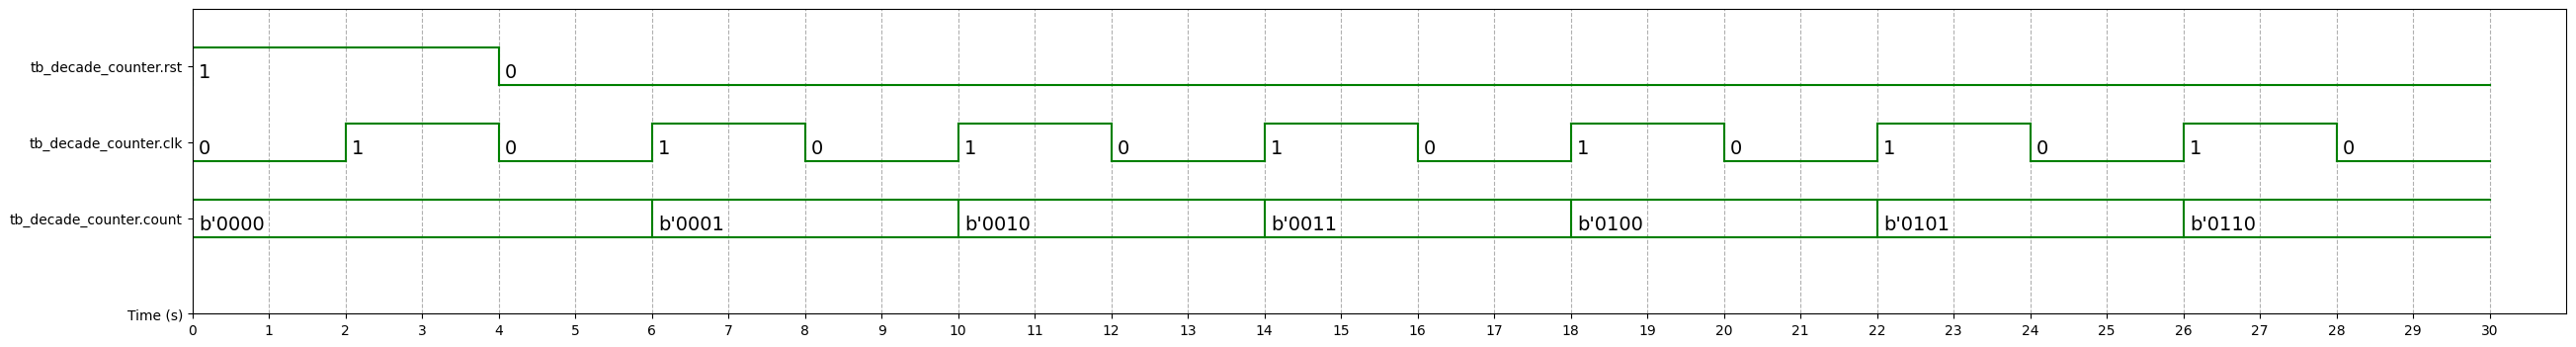

In [50]:
%%waveform tb_decade_counter.vcd
sign_list = ['tb_decade_counter.rst','tb_decade_counter.clk','tb_decade_counter.count']
time_begin = 0
time_end = 30
base = 'bin' # bin, dec, dec2, hex, octal

Is a 5 bit decade counter with the following specs:
When "rst" is low, the output "count" and output "ten" are set to ‘0’ immediately and counting is disabled.
  - When "rst" is high, the circuit increments on every two positive edge of the clk.
  - The highest count that can be reached is 5'b10010, after which the count will restart from 5'b0 again.
  - Only when the count is 5'b10010, the output ten is set to ‘0’ else the output ten will always be set to ‘1’.

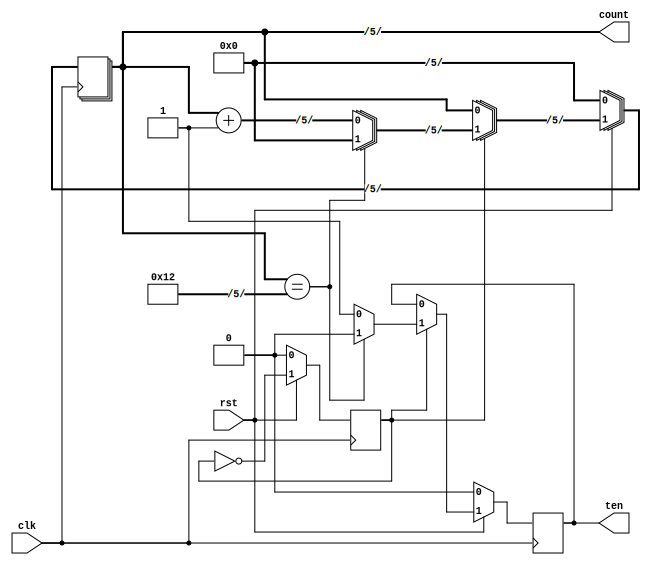

In [51]:
%%print_verilog
module decade_counter (
    input wire clk,      // Clock signal
    input wire rst,      // Active-high reset
    output reg [4:0] count, // 5-bit counter output
    output reg ten        // Output signal
);

    reg toggle; // Toggle bit to count every two clock cycles

    always @(posedge clk) begin
        if (!rst) begin
            count <= 5'b00000; // Reset count
            ten <= 1'b0;       // Set ten to 0
            toggle <= 1'b0;    // Reset toggle
        end
        else begin
            toggle <= ~toggle; // Toggle every clock cycle
            if (toggle) begin
                if (count == 5'b10010) begin
                    count <= 5'b00000; // Restart from 0 when reaching 18 (10010)
                    ten <= 1'b0;       // Set ten to 0 when count is 10010
                end
                else begin
                    count <= count + 1; // Increment count
                    ten <= 1'b1;        // ten remains 1 otherwise
                end
            end
        end
    end

endmodule




In [59]:
%%verilog
// Decade Counter Module
module decade_counter (
    input wire clk,
    input wire rst,
    output reg [4:0] count,
    output reg ten
);

    reg toggle;

    always @(posedge clk or negedge rst) begin
        if (!rst) begin
            count <= 5'b00000;
            toggle <= 1'b0;
        end else begin
            toggle <= ~toggle;
            if (toggle) begin // Increment on every second positive clock edge
                if (count == 5'b10010)
                    count <= 5'b00000;
                else
                    count <= count + 1;
            end
        end
    end

    always @(*) begin
        if (!rst || count == 5'b10010)
            ten = 1'b0;
        else
            ten = 1'b1;
    end
endmodule

module tb_decade_counter;

    reg clk, rst;
    wire [4:0] count;
    wire ten;

    // Instantiate the decade counter module
    decade_counter uut (
        .clk(clk),
        .rst(rst),
        .count(count),
        .ten(ten)
    );

    // Generate a faster clock (1 time unit per half cycle, 2 time units per full cycle)
    always #1 clk = ~clk;

    initial begin
        // Initialize signals
        clk = 0;
        rst = 0; // Initially in reset state

        // Test Case 1: Reset condition
        #2 rst = 1;  // De-assert reset after 2 time units
        #2 rst = 0;  // Assert reset again to check behavior
        #2 rst = 1;  // De-assert reset and allow counting

        // Let the counter run long enough to reach and reset at 5'b10010
        #310;

        // End simulation
        $finish;
    end

    initial begin
        $dumpfile("tb_decade_counter.vcd");
        $dumpvars(0, tb_decade_counter);
    end

    initial begin
        $monitor($time, " rst=%b clk=%b count=%b ten=%b", rst, clk, count, ten);
    end

endmodule






VCD info: dumpfile tb_decade_counter.vcd opened for output.
                   0 rst=0 clk=0 count=00000 ten=0
                   1 rst=0 clk=1 count=00000 ten=0
                   2 rst=1 clk=0 count=00000 ten=1
                   3 rst=1 clk=1 count=00000 ten=1
                   4 rst=0 clk=0 count=00000 ten=0
                   5 rst=0 clk=1 count=00000 ten=0
                   6 rst=1 clk=0 count=00000 ten=1
                   7 rst=1 clk=1 count=00000 ten=1
                   8 rst=1 clk=0 count=00000 ten=1
                   9 rst=1 clk=1 count=00001 ten=1
                  10 rst=1 clk=0 count=00001 ten=1
                  11 rst=1 clk=1 count=00001 ten=1
                  12 rst=1 clk=0 count=00001 ten=1
                  13 rst=1 clk=1 count=00010 ten=1
                  14 rst=1 clk=0 count=00010 ten=1
                  15 rst=1 clk=1 count=00010 ten=1
                  16 rst=1 clk=0 count=00010 ten=1
                  17 rst=1 clk=1 count=00011 ten=1
                  18 r

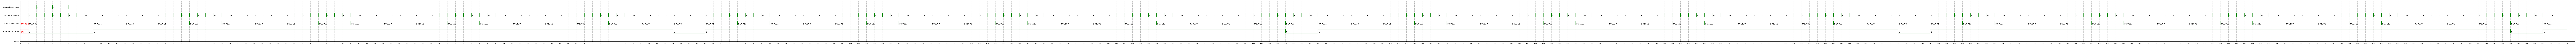

In [ ]:
%%waveform tb_decade_counter.vcd
sign_list = ['tb_decade_counter.rst','tb_decade_counter.clk','tb_decade_counter.count','tb_decade_counter.ten' ]
time_begin = 0
time_end = 316
base = 'bin' # bin, dec, dec2, hex, octal

Python test

In [61]:
import time

def decade_counter_simulation(cycles):
    count = 0
    ten = 1
    toggle = False
    rst = False

    def update_ten():
        return 0 if not rst or count == 18 else 1

    print(f"Cycle | Rst | Count | Ten")
    print("-------------------------")

    for cycle in range(cycles):
        if cycle == 2:
            rst = True  # Simulating reset release
        if cycle == 40:
            rst = False  # Simulating reset assertion
        if cycle == 42:
            rst = True  # Simulating reset release again

        if not rst:
            count = 0
            toggle = False
        else:
            toggle = not toggle
            if toggle:
                count = 0 if count == 18 else count + 1

        ten = update_ten()

        print(f"{cycle:5} | {int(rst):3} | {count:5} | {ten:3}")
        time.sleep(0.1)  # Simulating clock delay

# Run the simulation for 60 clock cycles
decade_counter_simulation(60)


Cycle | Rst | Count | Ten
-------------------------
    0 |   0 |     0 |   0
    1 |   0 |     0 |   0
    2 |   1 |     1 |   1
    3 |   1 |     1 |   1
    4 |   1 |     2 |   1
    5 |   1 |     2 |   1
    6 |   1 |     3 |   1
    7 |   1 |     3 |   1
    8 |   1 |     4 |   1
    9 |   1 |     4 |   1
   10 |   1 |     5 |   1
   11 |   1 |     5 |   1
   12 |   1 |     6 |   1
   13 |   1 |     6 |   1
   14 |   1 |     7 |   1
   15 |   1 |     7 |   1
   16 |   1 |     8 |   1
   17 |   1 |     8 |   1
   18 |   1 |     9 |   1
   19 |   1 |     9 |   1
   20 |   1 |    10 |   1
   21 |   1 |    10 |   1
   22 |   1 |    11 |   1
   23 |   1 |    11 |   1
   24 |   1 |    12 |   1
   25 |   1 |    12 |   1
   26 |   1 |    13 |   1
   27 |   1 |    13 |   1
   28 |   1 |    14 |   1
   29 |   1 |    14 |   1
   30 |   1 |    15 |   1
   31 |   1 |    15 |   1
   32 |   1 |    16 |   1
   33 |   1 |    16 |   1
   34 |   1 |    17 |   1
   35 |   1 |    17 |   1
   36 |   1 

### Git links

You need to download the constrain file:
https://github.com/Digilent/digilent-xdc/blob/master/Basys-3-Master.xdc